# JOB PROFILE PREDICTION

# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.utils import shuffle
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing

# Reading the dataset

In [2]:
data=pd.read_csv('jobpredict.csv')

In [3]:
data.head(10)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,etest_p,salary,Majoredu,workexp,location,skill1,skill2,skill3,skill4,Jobprofile
0,M,79.33,Central,78.33,Others,77.48,86.50,200000.0,Buisness,2,kolkata,Buisness Knowledge,Critical Thinking,TeamWork,Data Analysis,Accountant
1,M,63.00,Central,66.20,Central,65.60,60.00,300000.0,Buisness,6,kolkata,Buisness Knowledge,Critical Thinking,TeamWork,Data Analysis,Management consultant
2,F,50.00,Others,37.00,Others,52.00,65.00,NaN,Computer,2,Gurgaon,Programming Language,Hardware Knowledge,Leadership skills,Problem solving,It consultant
3,M,62.00,Central,60.33,Others,64.21,63.00,NaN,Architecture,5,Pune,Advance Math,Design skill,Leadership skills,Drawing,Architect
4,M,62.00,Others,63.00,Others,64.00,67.00,220000.0,Architecture,1,Mumbai,Advance Math,Design skill,TeamWork,Drawing,Structural Engineer
5,M,84.00,Others,90.90,Others,64.50,86.04,270000.0,Computer,7,Hyderabad,Programming Language,Hardware Knowledge,Leadership skills,Problem solving,System analyst
6,M,67.00,Others,91.00,Others,58.00,55.00,270000.0,Architecture,2,Delhi,Advance Math,Design skill,TeamWork,Drawing,Structural Engineer
7,F,76.00,Central,70.00,Central,76.00,66.00,300000.0,Computer,1,Delhi,Programming Language,Hardware Knowledge,Leadership skills,Problem solving,System analyst
8,M,82.00,Others,90.00,Others,83.00,80.00,200000.0,Architecture,1,Gurgaon,Advance Math,Design skill,Leadership skills,Drawing,Architect
9,M,62.00,Central,58.00,Others,53.00,89.00,168.0,Art,7,kolkata,Creative thinking,Composition skill,Leadership skills,Knowledge of art,Art director


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   gender      5020 non-null   object 
 1   ssc_p       5020 non-null   float64
 2   ssc_b       5020 non-null   object 
 3   hsc_p       5020 non-null   float64
 4   hsc_b       5020 non-null   object 
 5   degree_p    5020 non-null   float64
 6   etest_p     5020 non-null   float64
 7   salary      3306 non-null   float64
 8   Majoredu    5020 non-null   object 
 9   workexp     5020 non-null   int64  
 10  location    5020 non-null   object 
 11  skill1      5020 non-null   object 
 12  skill2      5020 non-null   object 
 13  skill3      5020 non-null   object 
 14  skill4      5020 non-null   object 
 15  Jobprofile  5020 non-null   object 
dtypes: float64(5), int64(1), object(10)
memory usage: 627.6+ KB


In [5]:
data.describe()

,ssc_p,hsc_p,degree_p,etest_p,salary,workexp
count,5020.000000,5020.000000,5020.000000,5020.000000,3306.000000,5020.000000
mean,66.635066,65.522584,66.232683,72.078014,286455.637024,3.984263
std,10.738573,11.425637,7.757092,13.182620,92936.246952,2.020307
min,40.890000,37.000000,50.000000,50.000000,168.000000,1.000000
25%,60.000000,60.000000,60.000000,60.000000,240000.000000,2.000000
50%,67.000000,64.200000,65.600000,70.000000,265000.000000,4.000000
75%,74.000000,73.000000,72.000000,84.000000,300000.000000,6.000000
max,89.400000,97.700000,91.000000,98.000000,940000.000000,7.000000


# Checking for missing values

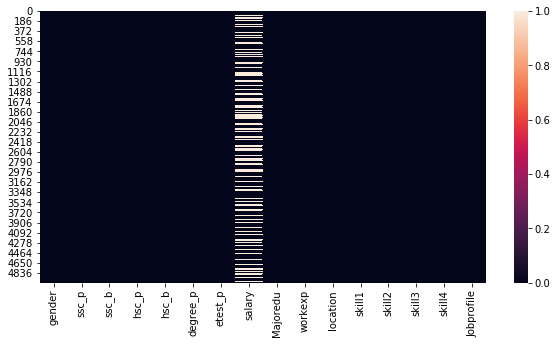

In [6]:
plt.figure(figsize=(10,5))
sns.heatmap(data.isnull())

# Missing value replacement

In [7]:
data['salary']=data['salary'].fillna(data['salary'].mean())

# After missing value replacement

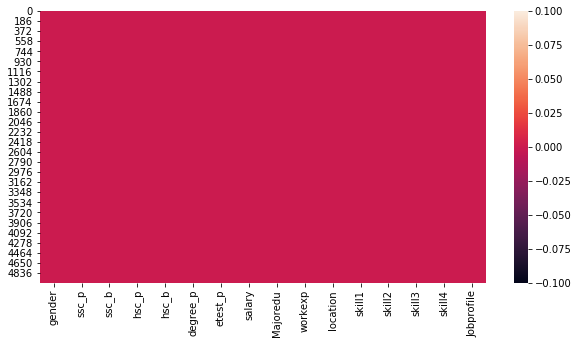

In [8]:
plt.figure(figsize=(10,5))
sns.heatmap(data.isnull())

# Data Transformation 

In [9]:
le = preprocessing.LabelEncoder()

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   gender      5020 non-null   object 
 1   ssc_p       5020 non-null   float64
 2   ssc_b       5020 non-null   object 
 3   hsc_p       5020 non-null   float64
 4   hsc_b       5020 non-null   object 
 5   degree_p    5020 non-null   float64
 6   etest_p     5020 non-null   float64
 7   salary      5020 non-null   float64
 8   Majoredu    5020 non-null   object 
 9   workexp     5020 non-null   int64  
 10  location    5020 non-null   object 
 11  skill1      5020 non-null   object 
 12  skill2      5020 non-null   object 
 13  skill3      5020 non-null   object 
 14  skill4      5020 non-null   object 
 15  Jobprofile  5020 non-null   object 
dtypes: float64(5), int64(1), object(10)
memory usage: 627.6+ KB


In [11]:
data['skill1']=le.fit_transform(data['skill1'])
data['skill2']=le.fit_transform(data['skill2'])
data['skill3']=le.fit_transform(data['skill3'])
data['skill4']=le.fit_transform(data['skill4'])
data['gender']=le.fit_transform(data['gender'])
data['Majoredu']=le.fit_transform(data['Majoredu'])
data['location']=le.fit_transform(data['location'])

# Feature selection

In [12]:
x=data[['gender','ssc_p','hsc_p','degree_p','etest_p','workexp','Majoredu','skill1','skill2','skill3','skill4']]
y=data['Jobprofile']

# Spliting the dataset

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=60)

# Naive bayes

In [15]:
from sklearn.naive_bayes import GaussianNB

In [16]:
gnb=GaussianNB()

# Training the model

In [17]:
gnb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

# Predictions

In [18]:
predictions=gnb.predict(x_test)

# Classification report

In [19]:
print(classification_report(y_test,predictions))

                       precision    recall  f1-score   support

           Accountant       0.27      0.36      0.31       118
            Architect       0.48      0.42      0.45       139
         Art director       1.00      1.00      1.00       152
    Commercial Artist       1.00      1.00      1.00       139
  Financial Analysist       0.33      0.23      0.27       139
        It consultant       0.42      0.45      0.44       119
Management consultant       0.33      0.33      0.33       146
           Programmer       1.00      1.00      1.00       144
  Structural Engineer       1.00      1.00      1.00       144
       System analyst       0.46      0.42      0.44       130
         Town planner       0.47      0.52      0.49       136

             accuracy                           0.62      1506
            macro avg       0.61      0.61      0.61      1506
         weighted avg       0.63      0.62      0.62      1506



# Confusion matrix

In [20]:
print(confusion_matrix(y_test,predictions))

[[ 43   0   0   0  24   0  51   0   0   0   0]
 [  0  59   0   0   0   0   0   0   0   0  80]
 [  0   0 152   0   0   0   0   0   0   0   0]
 [  0   0   0 139   0   0   0   0   0   0   0]
 [ 60   0   0   0  32   0  47   0   0   0   0]
 [  0   0   0   0   0  54   0   0   0  65   0]
 [ 57   0   0   0  41   0  48   0   0   0   0]
 [  0   0   0   0   0   0   0 144   0   0   0]
 [  0   0   0   0   0   0   0   0 144   0   0]
 [  0   0   0   0   0  75   0   0   0  55   0]
 [  0  65   0   0   0   0   0   0   0   0  71]]


# Accuracy of training and testing set

In [21]:
tr1=gnb.score(x_train,y_train)

In [22]:
t1=gnb.score(x_test,y_test)

# Logistic regression

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
logmodel=LogisticRegression()

# Training the model

In [25]:
logmodel.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Predictions

In [26]:
prediction=logmodel.predict(x_test)

# Classification report

In [27]:
print(classification_report(y_test,prediction))

                       precision    recall  f1-score   support

           Accountant       0.26      0.38      0.31       118
            Architect       0.49      0.46      0.47       139
         Art director       1.00      1.00      1.00       152
    Commercial Artist       1.00      1.00      1.00       139
  Financial Analysist       0.29      0.21      0.24       139
        It consultant       0.45      0.45      0.45       119
Management consultant       0.30      0.27      0.29       146
           Programmer       1.00      1.00      1.00       144
  Structural Engineer       1.00      1.00      1.00       144
       System analyst       0.49      0.49      0.49       130
         Town planner       0.48      0.51      0.49       136

             accuracy                           0.63      1506
            macro avg       0.61      0.62      0.61      1506
         weighted avg       0.63      0.63      0.63      1506



# Confusion matrix

In [28]:
print(confusion_matrix(y_test,prediction))

[[ 45   0   0   0  27   0  46   0   0   0   0]
 [  0  64   0   0   0   0   0   0   0   0  75]
 [  0   0 152   0   0   0   0   0   0   0   0]
 [  0   0   0 139   0   0   0   0   0   0   0]
 [ 64   0   0   0  29   0  46   0   0   0   0]
 [  0   0   0   0   0  53   0   0   0  66   0]
 [ 63   0   0   0  43   0  40   0   0   0   0]
 [  0   0   0   0   0   0   0 144   0   0   0]
 [  0   0   0   0   0   0   0   0 144   0   0]
 [  0   0   0   0   0  66   0   0   0  64   0]
 [  0  67   0   0   0   0   0   0   0   0  69]]


# Accuracy of training and testing set

In [29]:
tr2=logmodel.score(x_train,y_train)

In [30]:
t2=logmodel.score(x_test,y_test)

# K nearest neighbour

In [31]:
from sklearn.neighbors import KNeighborsClassifier 

In [32]:
knn = KNeighborsClassifier(n_neighbors=1)

# Training the model

In [33]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

# Predictions

In [34]:
predict=knn.predict(x_test)

# Classification report

In [35]:
print(classification_report(y_test,predict))

                       precision    recall  f1-score   support

           Accountant       0.10      0.12      0.11       118
            Architect       0.21      0.24      0.22       139
         Art director       0.54      0.44      0.49       152
    Commercial Artist       0.49      0.59      0.53       139
  Financial Analysist       0.09      0.09      0.09       139
        It consultant       0.14      0.17      0.15       119
Management consultant       0.14      0.13      0.13       146
           Programmer       0.70      0.40      0.50       144
  Structural Engineer       0.67      0.46      0.55       144
       System analyst       0.18      0.22      0.20       130
         Town planner       0.16      0.17      0.16       136

             accuracy                           0.28      1506
            macro avg       0.31      0.27      0.28      1506
         weighted avg       0.32      0.28      0.29      1506



# Confusion matrix

In [36]:
print(confusion_matrix(y_test,predict))

[[14  0  0  1 54  0 49  0  0  0  0]
 [ 0 34  1  0  1  0  2  0 15  0 86]
 [ 2  1 67 76  2  0  2  0  0  1  1]
 [ 2  0 48 82  2  0  2  1  2  0  0]
 [64  0  0  1 12  0 62  0  0  0  0]
 [ 0  0  3  1  0 20  0 12  0 83  0]
 [65  0  0  1 61  0 19  0  0  0  0]
 [ 0  0  0  4  0 40  0 57  0 43  0]
 [ 0 35  0  1  2  0  2  0 66  0 38]
 [ 0  0  3  1  0 86  0 12  0 28  0]
 [ 0 94  1  0  1  0  2  0 15  0 23]]


# Accuracy of training and testing set

In [37]:
tr3=knn.score(x_train,y_train)

In [38]:
t3=knn.score(x_test,y_test)

# Checking for optimum n_neighbour value

In [39]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

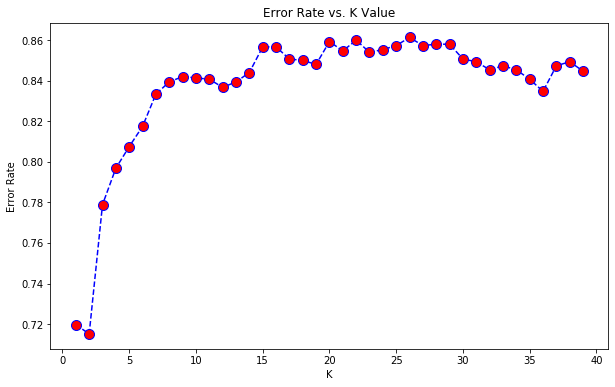

In [40]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [41]:
# NOW WITH K=2
knn = KNeighborsClassifier(n_neighbors=2)

knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print('WITH K=2')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=2


[[ 40   0   1   8  62   0   7   0   0   0   0]
 [  3  75   3   0   5   0   3   0  17   0  33]
 [ 11   4 104  31   1   1   0   0   0   0   0]
 [ 12   1  89  34   1   0   0   1   1   0   0]
 [119   0   1   3  10   0   6   0   0   0   0]
 [  0   0   6   2   2  57   0  30   0  22   0]
 [109   0   1   4  31   0   1   0   0   0   0]
 [  0   0   2   8   0  87   0  44   0   3   0]
 [  1  74   0   2   3   0   2   0  57   0   5]
 [  0   0   8   1   2 109   0   7   0   3   0]
 [  3 118   2   0   4   0   2   0   3   0   4]]


                       precision    recall  f1-score   support

           Accountant       0.13      0.34      0.19       118
            Architect       0.28      0.54      0.36       139
         Art director       0.48      0.68      0.56       152
    Commercial Artist       0.37      0.24      0.29       139
  Financial Analysist       0.08      0.07      0.08       139
        It consultant       0.22      0.48      0.31       119
Management consultant      

# Support vector machine

In [42]:
from sklearn.svm import SVC

In [43]:
svc=SVC()

# Training the model

In [44]:
svc.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# Predictions

In [45]:
predt = svc.predict(x_test)

# Classification report

In [46]:
print(classification_report(y_test,predt))

                       precision    recall  f1-score   support

           Accountant       0.00      0.00      0.00       118
            Architect       0.31      0.25      0.28       139
         Art director       0.00      0.00      0.00       152
    Commercial Artist       0.10      1.00      0.19       139
  Financial Analysist       0.00      0.00      0.00       139
        It consultant       0.00      0.00      0.00       119
Management consultant       0.00      0.00      0.00       146
           Programmer       0.00      0.00      0.00       144
  Structural Engineer       0.34      0.12      0.18       144
       System analyst       0.00      0.00      0.00       130
         Town planner       0.38      0.04      0.08       136

             accuracy                           0.13      1506
            macro avg       0.10      0.13      0.07      1506
         weighted avg       0.10      0.13      0.07      1506



# Confusion matrix

In [47]:
print(confusion_matrix(y_test,predt))

[[  0   6   0 108   0   0   0   0   3   0   1]
 [  0  35   0  85   0   0   0   0  15   0   4]
 [  0   0   0 152   0   0   0   0   0   0   0]
 [  0   0   0 139   0   0   0   0   0   0   0]
 [  0   4   0 131   0   0   0   0   4   0   0]
 [  0   0   0 119   0   0   0   0   0   0   0]
 [  0   5   0 140   0   0   0   0   1   0   0]
 [  0   0   0 144   0   0   0   0   0   0   0]
 [  0  25   0  97   0   0   0   0  17   0   5]
 [  0   1   0 129   0   0   0   0   0   0   0]
 [  0  37   0  83   0   0   0   0  10   0   6]]


#                       Accuracy of training and testing set

In [48]:
svc.score(x_train,y_train)

0.1377347751849744

In [49]:
svc.score(x_test,y_test)

0.13081009296148738

 # Checking for different parameters

In [50]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

# Training the model

In [53]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.102, total=   1.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.102, total=   1.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.7s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.101, total=   1.5s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.101, total=   1.5s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.101, total=   1.5s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.102, total=   0.7s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.102, total=   0.7s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.101, total=   0.7s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.101, total=   0.8s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.418, total=   1.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.445, total=   0.9s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.420, total=   0.9s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.464, total=   0.9s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.433, total=   0.9s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.562, total=   0.5s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.595, total=   0.6s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .

[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.541, total=   0.9s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.550, total=   1.1s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.600, total=   0.4s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.606, total=   0.4s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.602, total=   0.4s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.633, total=   0.4s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.607, total=   0.4s


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  1.8min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [54]:
grid.best_params_

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}

In [55]:
grid.best_estimator_

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# Predictions

In [56]:
grid_predictions = grid.predict(x_test)

# Classification report

In [57]:
print(classification_report(y_test,grid_predictions))

                       precision    recall  f1-score   support

           Accountant       0.25      0.47      0.33       118
            Architect       0.44      0.46      0.45       139
         Art director       1.00      1.00      1.00       152
    Commercial Artist       1.00      1.00      1.00       139
  Financial Analysist       0.31      0.12      0.17       139
        It consultant       0.35      0.24      0.29       119
Management consultant       0.34      0.30      0.32       146
           Programmer       1.00      1.00      1.00       144
  Structural Engineer       1.00      1.00      1.00       144
       System analyst       0.46      0.59      0.52       130
         Town planner       0.43      0.41      0.42       136

             accuracy                           0.61      1506
            macro avg       0.60      0.60      0.59      1506
         weighted avg       0.61      0.61      0.60      1506



# Confusion matrix

In [58]:
print(confusion_matrix(y_test,grid_predictions))

[[ 56   0   0   0  15   0  47   0   0   0   0]
 [  0  64   0   0   0   0   0   0   0   0  75]
 [  0   0 152   0   0   0   0   0   0   0   0]
 [  0   0   0 139   0   0   0   0   0   0   0]
 [ 83   0   0   0  16   0  40   0   0   0   0]
 [  0   0   0   0   0  29   0   0   0  90   0]
 [ 82   0   0   0  20   0  44   0   0   0   0]
 [  0   0   0   0   0   0   0 144   0   0   0]
 [  0   0   0   0   0   0   0   0 144   0   0]
 [  0   0   0   0   0  53   0   0   0  77   0]
 [  0  80   0   0   0   0   0   0   0   0  56]]


# Accuracy of training and testing set

In [59]:
tr4=grid.score(x_train,y_train)

In [60]:
t4=grid.score(x_test,y_test)

# Result analysis

Comparing the algorithms

# Precision Graph

In [61]:
a1=['Naive bayes','Logistic Regression','K nearest neighbour','Support Vector machine']
b1=[0.63,0.62,0.32,0.61]

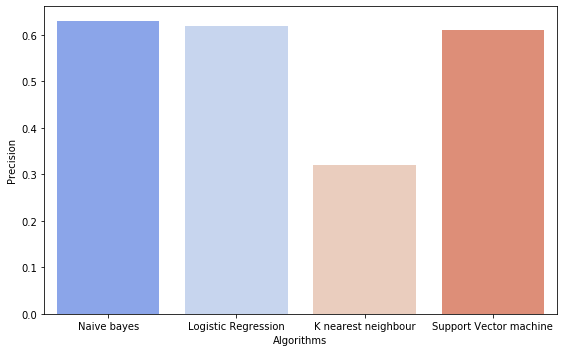

In [62]:
plt.figure(figsize=(8,5))
sns.barplot(x=a1,y=b1,palette='coolwarm')
plt.xlabel('Algorithms')
plt.ylabel('Precision')
plt.tight_layout()
plt.savefig('rr2.png')

# Recall Graph

In [63]:
a2=['Naive bayes','Logistic Regression','K nearest neighbour','Support Vector machine']
b2=[0.62,0.63,0.32,0.61]

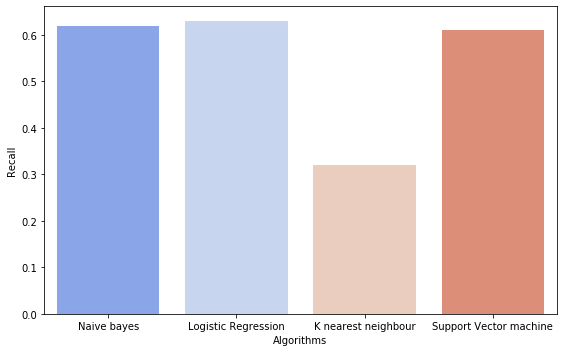

In [64]:
plt.figure(figsize=(8,5))
sns.barplot(x=a2,y=b2,palette='coolwarm')
plt.xlabel('Algorithms')
plt.ylabel('Recall')
plt.tight_layout()
plt.savefig('rr3.png')

# F1- score graph

In [65]:
a3=['Naive bayes','Logistic Regression','K nearest neighbour','Support Vector machine']
b3=[0.62,0.63,0.29,0.60]

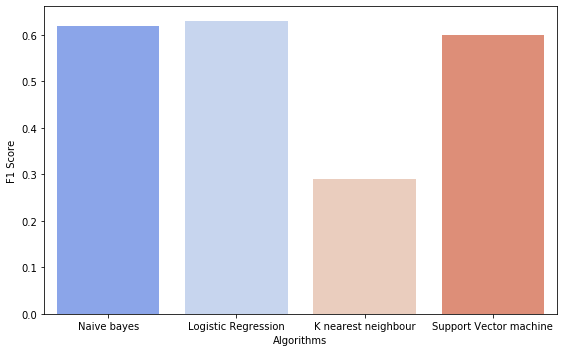

In [66]:
plt.figure(figsize=(8,5))
sns.barplot(x=a3,y=b3,palette='coolwarm')
plt.xlabel('Algorithms')
plt.ylabel('F1 Score')
plt.tight_layout()
plt.savefig('rr4.png')

# Accuracy of training set

In [67]:
algo=['Naive bayes','Logistic Regression','K nearest neighbour','Support Vector machine']
tr=[tr1,tr2,tr3,tr4]

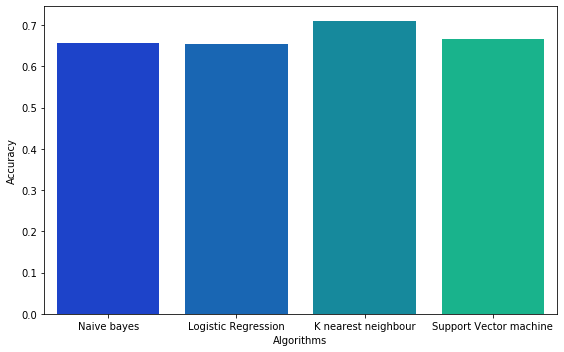

In [68]:
plt.figure(figsize=(8,5))
sns.barplot(x=algo,y=tr,palette='winter')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.savefig('rr5.png')

# Accuracy of testing set

In [69]:
algo1=['Naive bayes','Logistic Regression','K nearest neighbour','Support Vector machine']
t1=[t1,t2,t3,t4]

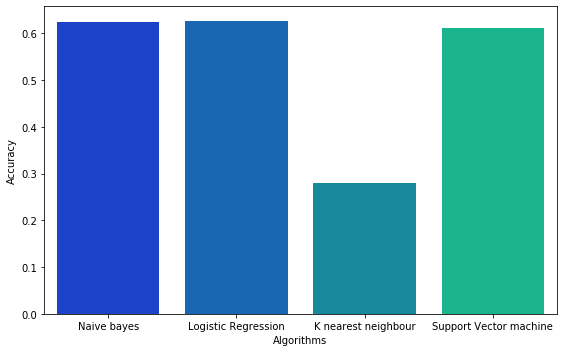

In [70]:
plt.figure(figsize=(8,5))
sns.barplot(x=algo1,y=t1,palette='winter')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.savefig('rr6.png')

In [71]:
a=['Naive bayes','Logistic Regression','K nearest neighbour','Support Vector machine']
b=[0.62,0.63,0.28,0.61]

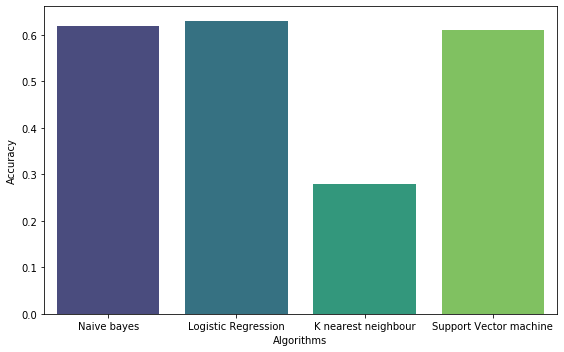

In [72]:
plt.figure(figsize=(8,5))
sns.barplot(x=a,y=b,palette='viridis')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.savefig('rr1.png')

From above graphs, Logistic regression has highest accuracy for training and testing and for precision, recall.

Hence comparing all the algorithms Logistic regression is optimum for this classification problem.